## Step 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('continuous dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = df.drop(['T2M_san', 'QV2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'Holiday_ID', 'holiday', 'school'], axis=1)

In [5]:
df.head(10)

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,TQL_san,W2M_san,W2M_dav
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,0.001855,10.328949,5.364148
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,0.001327,10.681517,5.572471
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,0.001428,10.874924,5.871184
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,0.002599,10.518620,5.883621
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,0.001729,9.733589,5.611724
5,2015-01-03 06:00:00,879.2323,26.034143,0.019080,0.014542,20.062038,0.001485,9.087273,5.280351
6,2015-01-03 07:00:00,932.4876,26.691492,0.019332,0.006645,21.623496,0.002176,11.395393,5.126911
7,2015-01-03 08:00:00,1048.9720,27.674066,0.019370,0.006863,23.775317,0.004539,12.872866,5.060611
8,2015-01-03 09:00:00,1167.9074,28.760400,0.019171,0.010231,24.636152,0.004292,14.548027,4.915658
9,2015-01-03 10:00:00,1257.5069,29.766656,0.018759,0.009018,25.862671,0.004921,15.081688,4.685580


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   TQL_san     48048 non-null  float64
 7   W2M_san     48048 non-null  float64
 8   W2M_dav     48048 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.3+ MB


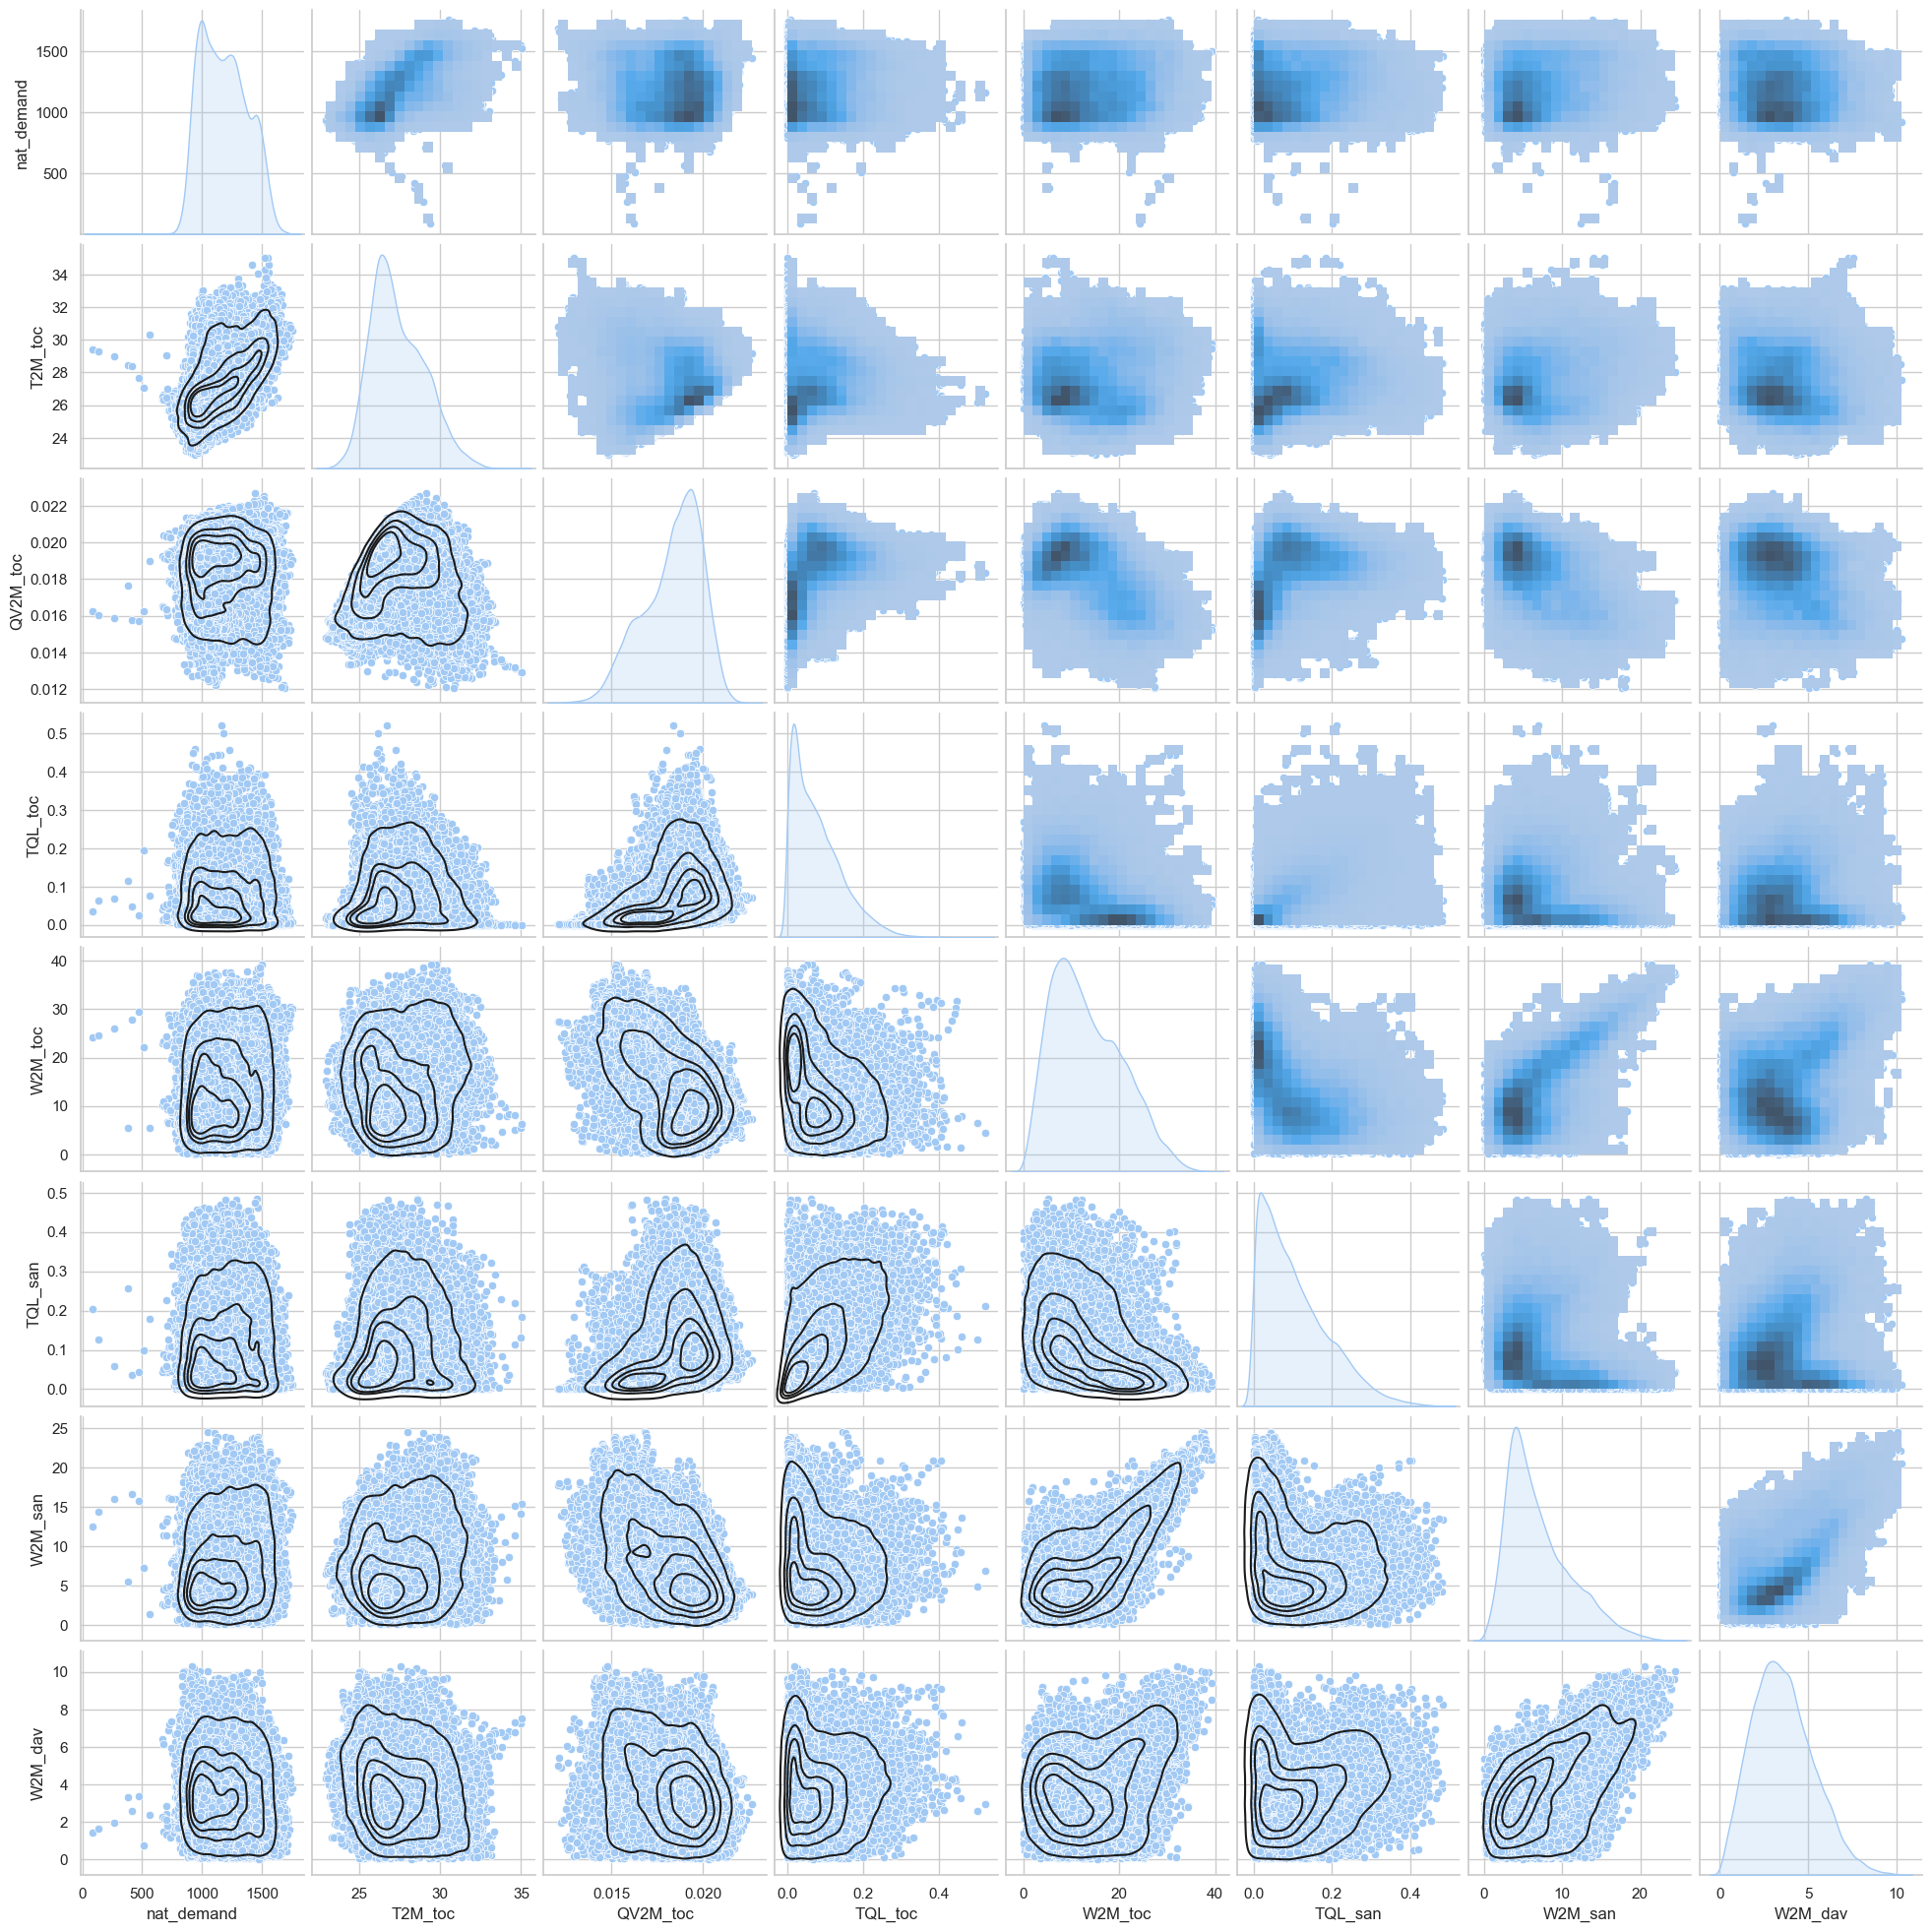

In [7]:
sns.set_theme(style='whitegrid', palette='pastel')

ax = sns.pairplot(df, diag_kind='kde')
ax.map_upper(sns.histplot, bins=20)
ax.map_lower(sns.kdeplot, levels=5, color='.1')

plt.show()

## Step 2

In [8]:
df.mean().round(5)

nat_demand    1182.86865
T2M_toc         27.39911
QV2M_toc         0.01831
TQL_toc          0.07998
W2M_toc         13.39105
TQL_san          0.10627
W2M_san          7.04667
W2M_dav          3.56759
dtype: float64

In [9]:
df.var().round(10)

nat_demand    36890.460936
T2M_toc           2.807174
QV2M_toc          0.000003
TQL_toc           0.004302
W2M_toc          53.224353
TQL_san           0.007446
W2M_san          16.840447
W2M_dav           2.925884
dtype: float64

## Step 3

In [10]:
df['median'] = np.where(df['nat_demand']>=df['nat_demand'].median(), 'greater', 'less')

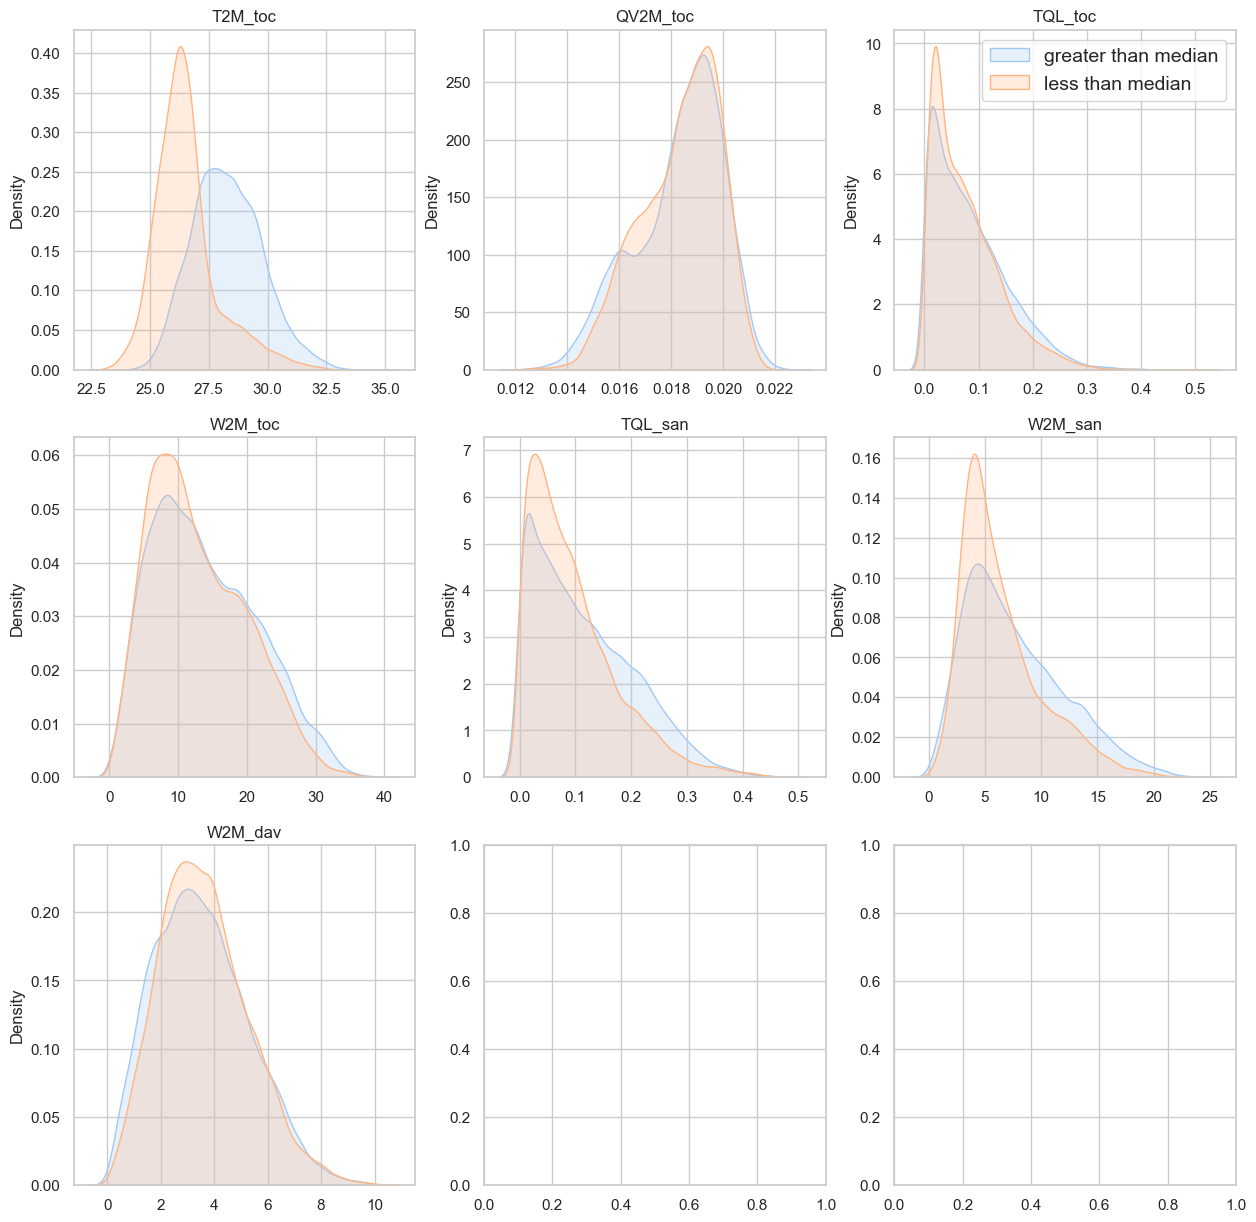

In [11]:
fig1 = plt.subplots(3, 3, figsize = (15, 15))

for i, col in enumerate(df.columns.tolist()[2:-1]):
    
    plt.subplot(3, 3, i + 1)
    
    sns.kdeplot(df.loc[df['median'] == 'greater', col], shade = True, label = 'greater than median')
    sns.kdeplot(df.loc[df['median'] == 'less', col], shade = True, label = "less than median")
    
    plt.xlabel('')
    plt.title(col)
    
    if i == 2:
        plt.legend(loc = 'upper right', fontsize = 14)
    else:
        plt.legend().remove()
        
plt.show()

In [12]:
df.loc[df['median'] == 'greater'].mean().round(5)

nat_demand    1345.16681
T2M_toc         28.27307
QV2M_toc         0.01829
TQL_toc          0.08397
W2M_toc         13.91390
TQL_san          0.11660
W2M_san          7.65282
W2M_dav          3.51999
dtype: float64

In [13]:
df.loc[df['median'] == 'greater'].round(10)

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,TQL_san,W2M_san,W2M_dav,median
9,2015-01-03 10:00:00,1257.5069,29.766656,0.018759,0.009018,25.862671,0.004921,15.081688,4.685580,greater
10,2015-01-03 11:00:00,1254.5830,30.523767,0.018408,0.004322,26.828082,0.007439,15.287239,4.069102,greater
11,2015-01-03 12:00:00,1216.9004,30.981805,0.018134,0.002798,26.654310,0.009872,15.280927,3.122228,greater
12,2015-01-03 13:00:00,1202.1556,31.211206,0.017905,0.002647,25.754161,0.013424,15.038157,2.900531,greater
13,2015-01-03 14:00:00,1197.2616,31.156519,0.017744,0.001465,24.902172,0.016586,14.698079,2.914703,greater
...,...,...,...,...,...,...,...,...,...,...
48034,2020-06-26 11:00:00,1192.4966,28.873804,0.019975,0.137573,13.182539,0.092651,5.451295,0.779174,greater
48035,2020-06-26 12:00:00,1208.1201,28.863702,0.019838,0.111420,11.814610,0.107849,5.648993,1.051293,greater
48036,2020-06-26 13:00:00,1225.1657,28.781976,0.019571,0.101837,8.835990,0.127197,6.216295,1.316051,greater
48037,2020-06-26 14:00:00,1220.4969,28.718103,0.019242,0.117004,5.991976,0.114349,6.485374,1.449518,greater


In [14]:
df.loc[df['median'] == 'less'].mean().round(5)

nat_demand    1020.57048
T2M_toc         26.52515
QV2M_toc         0.01834
TQL_toc          0.07599
W2M_toc         12.86820
TQL_san          0.09593
W2M_san          6.44053
W2M_dav          3.61519
dtype: float64

In [15]:
df.loc[df['median'] == 'less'].var().round(10)

nat_demand    7411.655389
T2M_toc          1.893283
QV2M_toc         0.000002
TQL_toc          0.003914
W2M_toc         48.613278
TQL_san          0.006424
W2M_san         13.496987
W2M_dav          2.759579
dtype: float64

## Step 4

In [16]:
df = df.sample(1000, random_state=57)

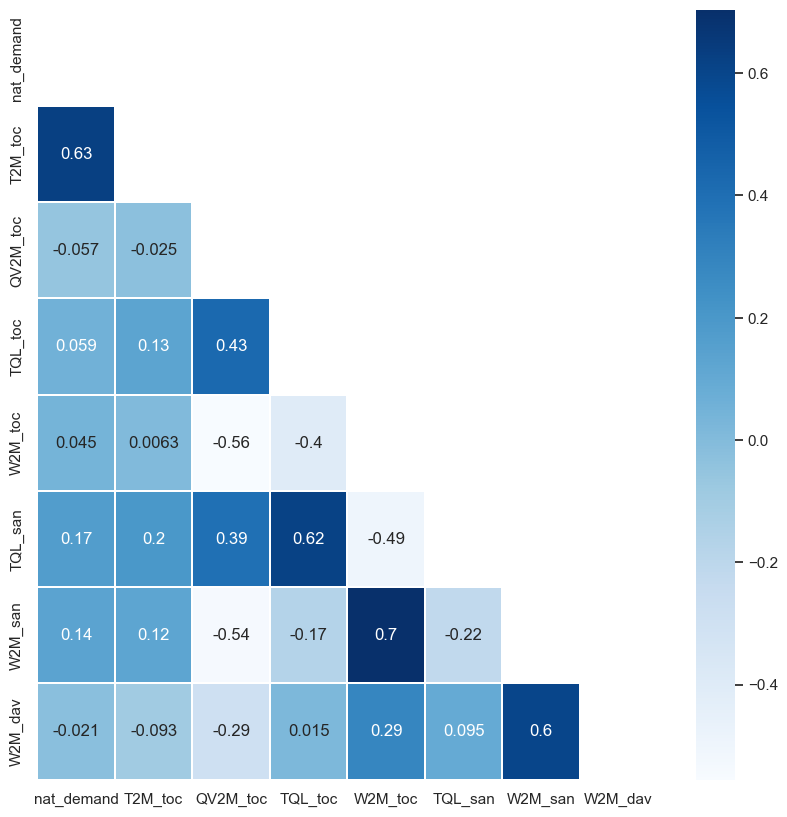

In [17]:
matrix = np.triu(df.corr())

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidths=0.25, mask=matrix)

plt.show()

In [18]:
def estimation(variable, target, alpha=0.05):
    r, pvalue = scipy.stats.pearsonr(variable, target)
    
    r_to_z = np.arctanh(r)
    se = 1 / np.sqrt(variable.count() - 3)
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    int_a, int_b = r_to_z - z * se, r_to_z + z * se
    int_a, int_b = np.tanh(int_a), np.tanh(int_b)
    
    print('Correlation Coefficient: {:.4f}'.format(r))
    print('Confidence Interval: ({:.4f}, {:.4f})'.format(int_a, int_b))
    print('Significance Level:', pvalue)

In [19]:
estimation(df.nat_demand, df.T2M_toc)

Correlation Coefficient: 0.6272
Confidence Interval: (0.5880, 0.6634)
Significance Level: 2.004675965213034e-110


In [20]:
estimation(df.nat_demand, df.QV2M_toc)

Correlation Coefficient: -0.0569
Confidence Interval: (-0.1185, 0.0051)
Significance Level: 0.07212180850282829


In [21]:
estimation(df.nat_demand, df.TQL_toc)

Correlation Coefficient: 0.0590
Confidence Interval: (-0.0030, 0.1205)
Significance Level: 0.06223952175817308


In [22]:
estimation(df.nat_demand, df.W2M_toc)

Correlation Coefficient: 0.0446
Confidence Interval: (-0.0175, 0.1063)
Significance Level: 0.1591755681112781


In [23]:
estimation(df.nat_demand, df.TQL_san)

Correlation Coefficient: 0.1718
Confidence Interval: (0.1110, 0.2313)
Significance Level: 4.5813909163240186e-08


In [24]:
estimation(df.nat_demand, df.W2M_san)

Correlation Coefficient: 0.1376
Confidence Interval: (0.0762, 0.1979)
Significance Level: 1.2657552746921284e-05


In [25]:
estimation(df.nat_demand, df.W2M_dav)

Correlation Coefficient: -0.0211
Confidence Interval: (-0.0830, 0.0409)
Significance Level: 0.5045780230013224


## Step 5

In [26]:
df = pd.read_csv('continuous dataset.csv')
df = df.drop(['T2M_san', 'QV2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav', 'Holiday_ID', 'holiday', 'school'], axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df[list(df.columns)[2:]], df['nat_demand'], random_state=0)

In [28]:
x_train

,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,TQL_san,W2M_san,W2M_dav
43108,25.998499,0.019171,0.107361,13.076192,0.024704,3.465846,3.188531
4901,26.433984,0.019311,0.018738,15.417017,0.024971,7.089610,3.711229
10957,32.119592,0.016405,0.022423,15.304267,0.287354,6.237893,4.335361
32100,29.274683,0.018654,0.136963,9.780864,0.274902,8.824290,4.636000
22167,28.369714,0.019051,0.155823,8.968619,0.185364,5.593362,4.008896
...,...,...,...,...,...,...,...
21243,26.740472,0.019556,0.030495,5.474529,0.048706,4.751239,4.276771
45891,25.475244,0.015384,0.023689,20.023535,0.031235,8.694430,4.596277
42613,28.547235,0.018691,0.205933,9.473457,0.102905,2.654136,2.552732
43567,27.209619,0.020352,0.097534,14.909977,0.074310,5.368096,1.826127


In [29]:
lregressor = LinearRegression()
lregressor.fit(x_train, y_train)

mae = mean_absolute_error(y_test, lregressor.predict(x_test))
mse = mean_squared_error(y_test, lregressor.predict(x_test))
r2 = r2_score(y_test, lregressor.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))
print('Сoefficients:', lregressor.coef_)

Mean Absolute Error: 117.201
Mean Squared Error: 20678.979
R2 Score: 0.438
Сoefficients: [ 7.14823057e+01  1.61101900e+03 -4.08029945e+01  1.31060163e+00
  1.59092641e+02  3.93103256e+00 -2.49967973e+00]


In [30]:
lasso = Lasso(alpha=1, random_state=0)
lasso.fit(x_train, y_train)

mae = mean_absolute_error(y_test, lasso.predict(x_test))
mse = mean_squared_error(y_test, lasso.predict(x_test))
r2 = r2_score(y_test, lasso.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))
print('Сoefficients:', lasso.coef_)

Mean Absolute Error: 117.665
Mean Squared Error: 20807.116
R2 Score: 0.434
Сoefficients: [72.9971577   0.          0.          0.41020853  0.          3.33571577
 -0.        ]


In [31]:
ridge = Ridge(alpha=1, random_state=0)
ridge.fit(x_train, y_train)

mae = mean_absolute_error(y_test, ridge.predict(x_test))
mse = mean_squared_error(y_test, ridge.predict(x_test))
r2 = r2_score(y_test, ridge.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))
print('Сoefficients:', ridge.coef_)

Mean Absolute Error: 117.178
Mean Squared Error: 20686.846
R2 Score: 0.438
Сoefficients: [ 71.50047049  85.14892795 -29.81919996   1.24357394 159.15255899
   3.74422732  -2.5459334 ]


## Step 7

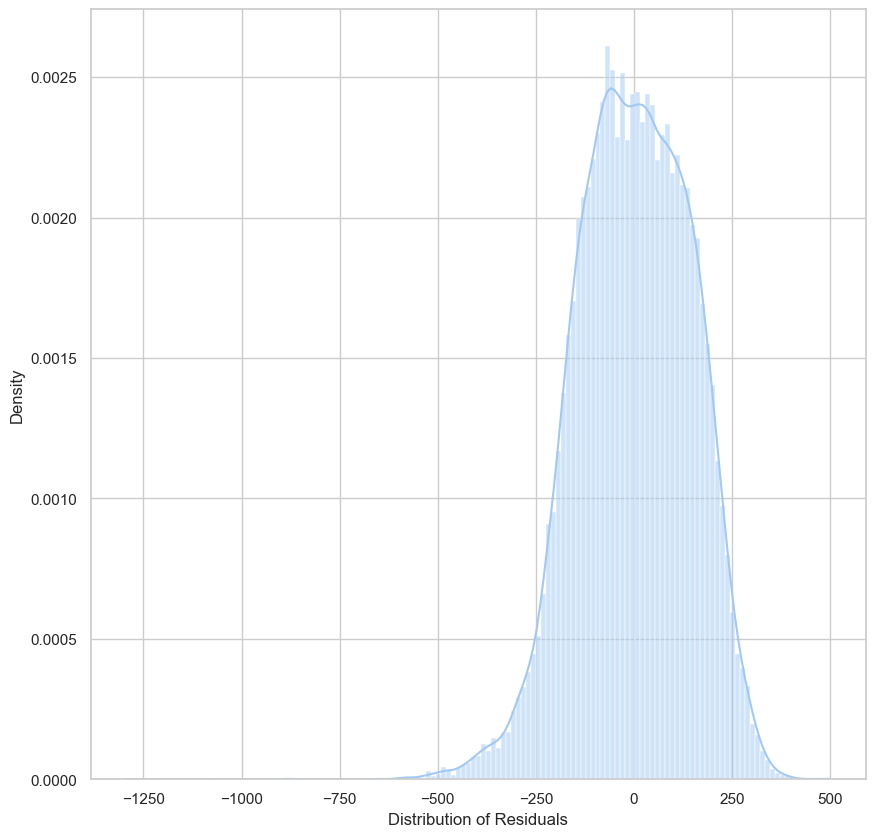

In [32]:
df1 = y_train - lregressor.predict(x_train)

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

residuals = sns.histplot(df1, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')

plt.show()

In [33]:
df1 = pd.DataFrame(df1).sample(1000, random_state=0)

In [34]:
args = scipy.stats.norm.fit(df1['nat_demand'])
kstest = scipy.stats.kstest(df1['nat_demand'], cdf='norm', args=args).pvalue
cramervonmises = scipy.stats.cramervonmises(df1['nat_demand'], cdf='norm', args=args).pvalue

print('Kolmogorov-Smirnov Test:', kstest)
print('Cramer–Von Mises Test:', cramervonmises)

Kolmogorov-Smirnov Test: 0.369835020195284
Cramer–Von Mises Test: 0.33329171177331585


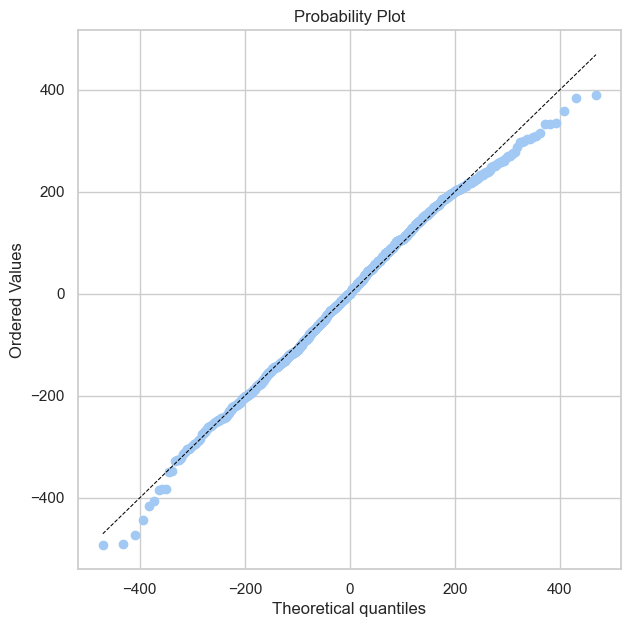

In [35]:
figure, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_theme(style='whitegrid', palette='pastel')
    
args = scipy.stats.norm.fit(df1['nat_demand'])
scipy.stats.probplot(df1['nat_demand'], dist=scipy.stats.norm, sparams=(args), plot=ax)
    
ax.get_lines()[0].set_marker('o')
    
ax.get_lines()[1].set_ls('--')
ax.get_lines()[1].set_color('black')
ax.get_lines()[1].set_linewidth(0.75)
    
plt.show()